In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
df= pd.read_csv('D:\\Stock_Anlysis\\btc_data.csv', parse_dates=['Date'])

In [4]:
df.set_index('Date', inplace=True)

In [5]:
df['Price_Range'] = df['High'] - df['Low']
df['Net_Change'] = df['Close'] - df['Open']
df['Normalized_Range'] = (df['High'] - df['Low']) / df['Close']
df['Day_of_Week'] = df.index.dayofweek
df['Month'] = df.index.month
df['Year'] = df.index.year

In [104]:
df['Adj Close']

Date
2014-10-07 00:00:00+00:00      336.187012
2014-10-08 00:00:00+00:00      352.940002
2014-10-09 00:00:00+00:00      365.026001
2014-10-10 00:00:00+00:00      361.562012
2014-10-11 00:00:00+00:00      362.299011
                                 ...     
2024-11-22 00:00:00+00:00    98997.664060
2024-11-23 00:00:00+00:00    97777.281250
2024-11-24 00:00:00+00:00    98013.820310
2024-11-25 00:00:00+00:00    93102.296880
2024-11-26 00:00:00+00:00    91985.320310
Name: Adj Close, Length: 3704, dtype: float64

In [6]:
for lag in range(1, 8):  # Create lags for the past 7 days
    df[f'Adj_Close_Lag{lag}'] = df['Adj Close'].shift(lag)

In [7]:
df.dropna(inplace=True)

In [8]:
df['MA_7'] = df['Adj Close'].rolling(window=7).mean()
df['MA_14'] = df['Adj Close'].rolling(window=14).mean()

In [9]:
df['Target'] = df['Adj Close'].shift(-1)  # Shift -1 for 1-day ahead forecasting
df = df.dropna() 

In [40]:

columns_to_keep = ['Price_Range', 'Net_Change', 'Normalized_Range', 'Day_of_Week', 'Adj_Close_Lag1','MA_7']


In [41]:
X = df[columns_to_keep]
y = df['Target']

In [42]:
train_size = int(0.8 * len(df))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

<Axes: title={'center': 'BTC Price Prediction'}, xlabel='Date'>

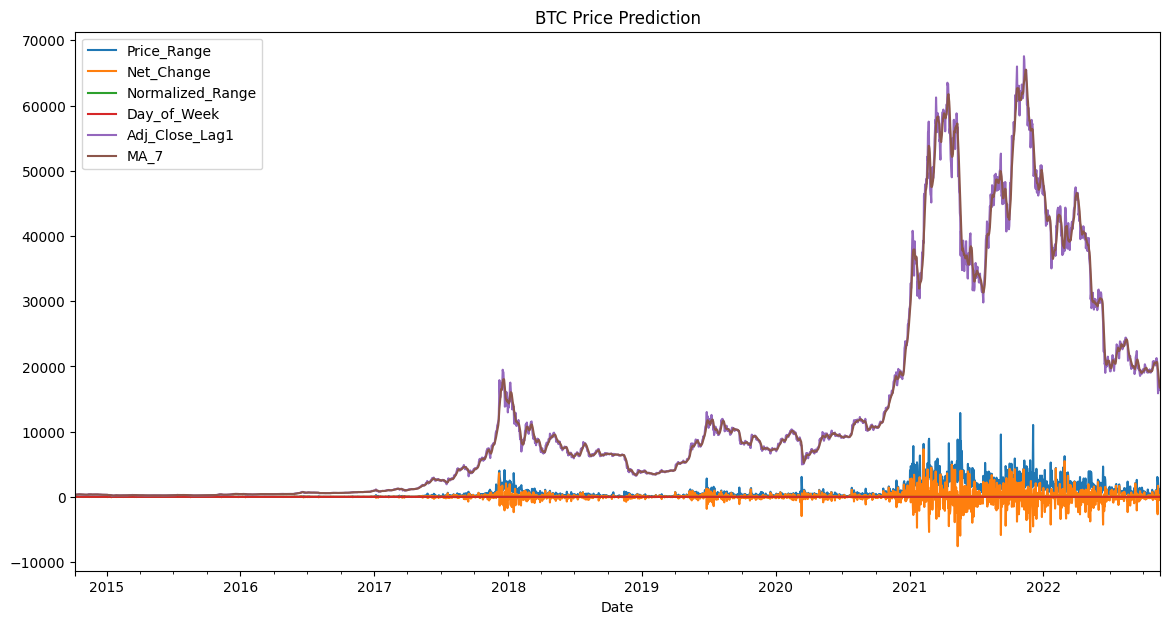

In [32]:
X_train.plot(figsize=(14, 7), title='BTC Price Prediction', legend=True)


In [38]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 5, 10]
}

# Initialize model
xgb = XGBRegressor()

# Grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.9}


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train the XGBoost Model
model = XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 3, n_estimators= 300, reg_alpha= 0, reg_lambda= 1, subsample= 0.9)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2384.2739690224357
Root Mean Squared Error (RMSE): 5228.4936808600305


<Axes: title={'center': 'BTC Price Prediction'}, xlabel='Date'>

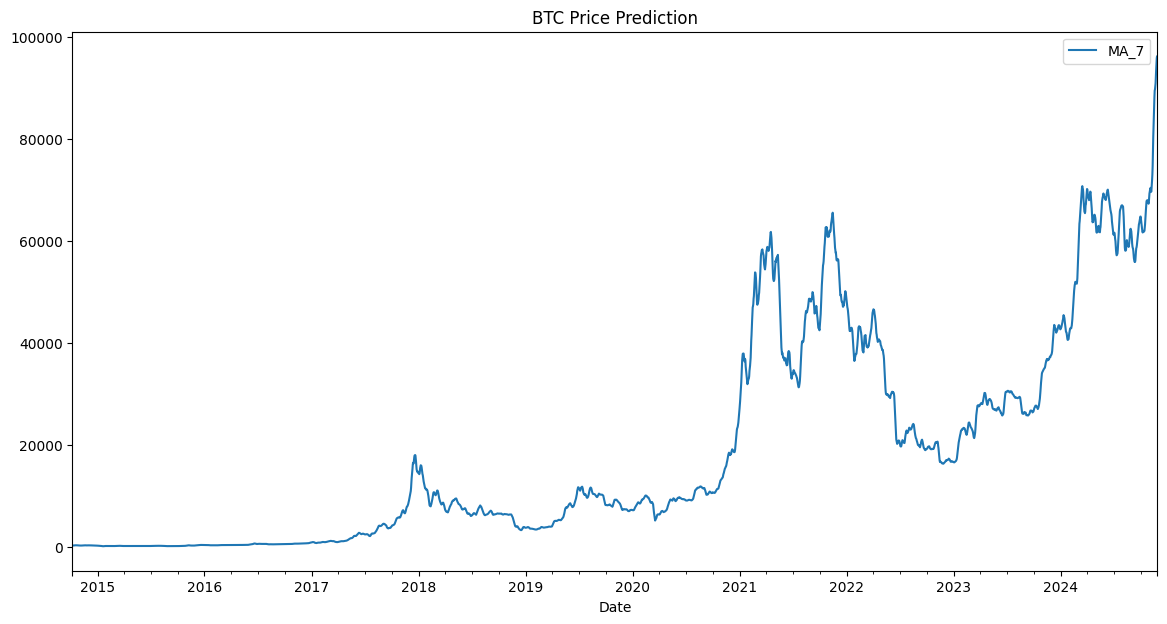

In [27]:
df['MA_7'].plot(figsize=(14, 7), title='BTC Price Prediction', legend=True)

<Axes: title={'center': 'BTC Price Prediction'}, xlabel='Date'>

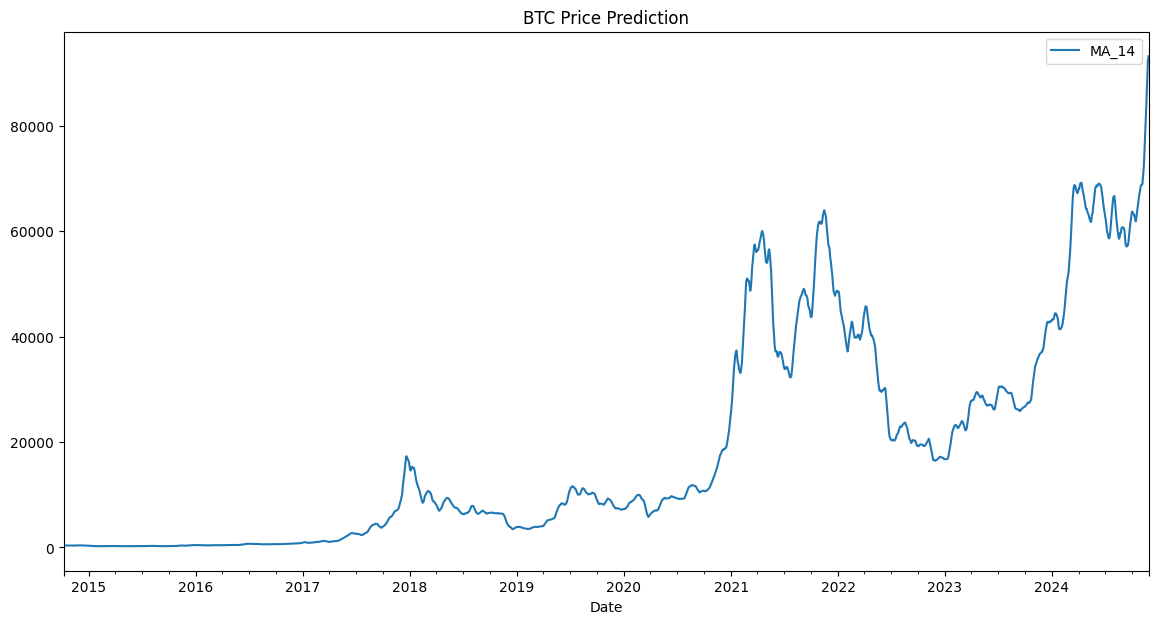

In [28]:
df['MA_14'].plot(figsize=(14, 7), title='BTC Price Prediction', legend=True)

<Axes: title={'center': 'BTC Price Prediction'}, xlabel='Date'>

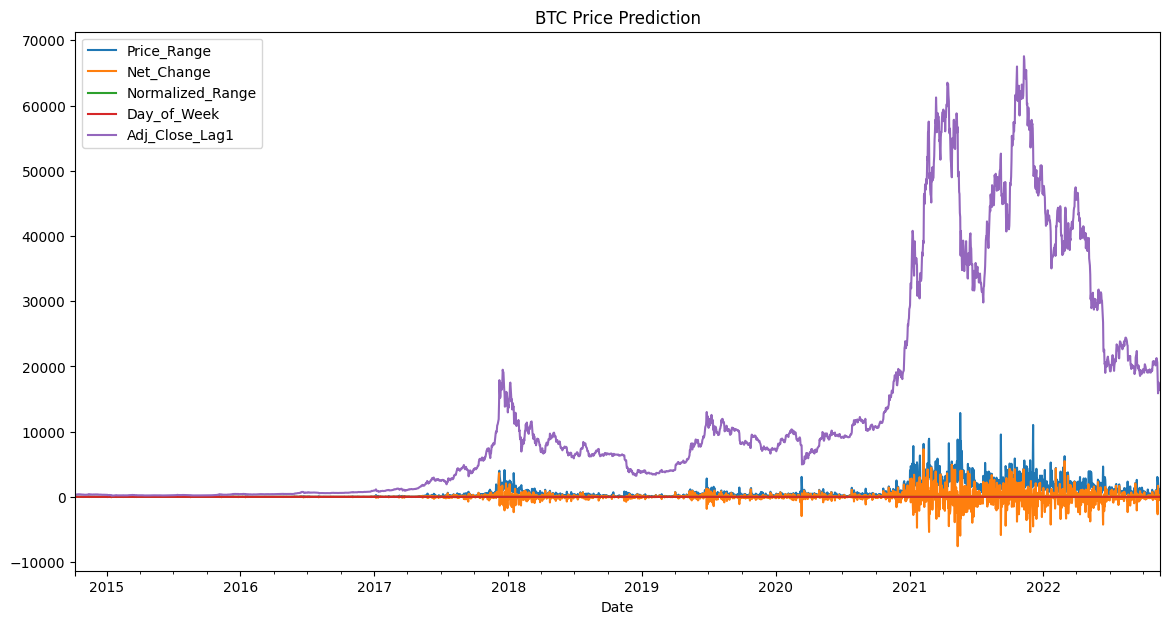

In [20]:
X_train.plot(figsize=(14, 7), title='BTC Price Prediction', legend=True)


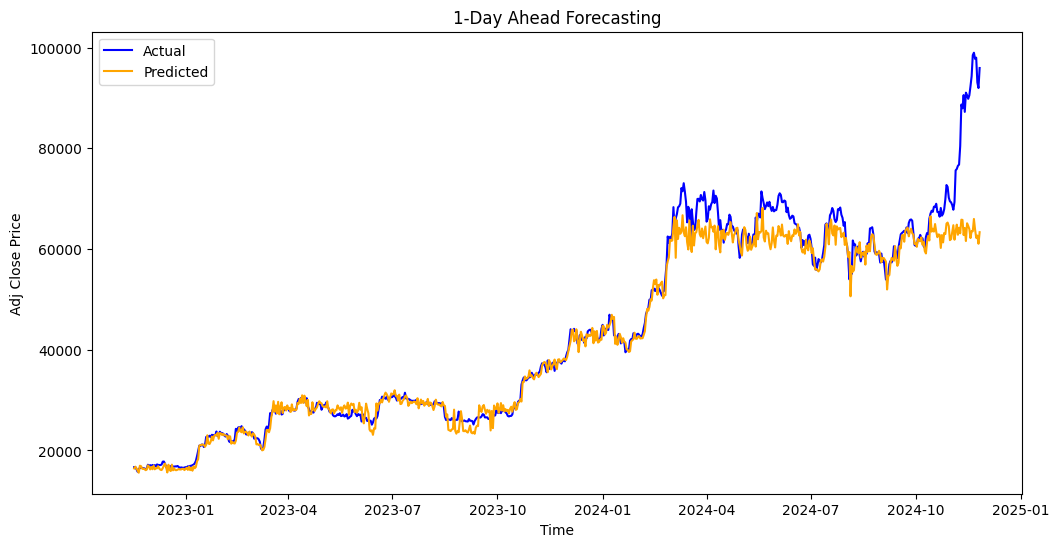

In [21]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index,y_test.values, label="Actual", color='blue')
plt.plot(y_test.index,y_pred, label="Predicted", color='orange')
plt.title("1-Day Ahead Forecasting")
plt.xlabel("Time")
plt.ylabel("Adj Close Price")
plt.legend()
plt.show()


<Figure size 1000x800 with 0 Axes>

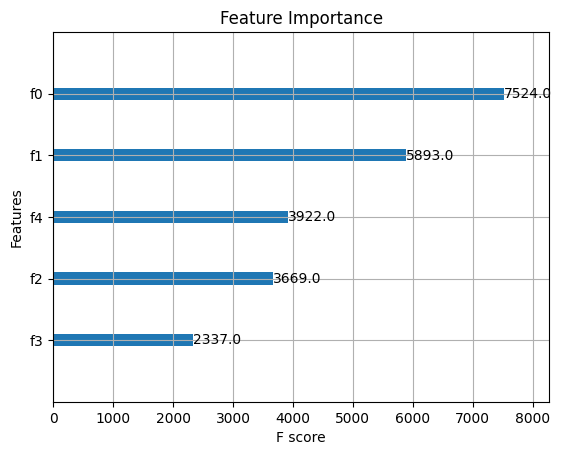

In [91]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight', max_num_features=20)  # Adjust max_num_features as needed
plt.title("Feature Importance")
plt.show()


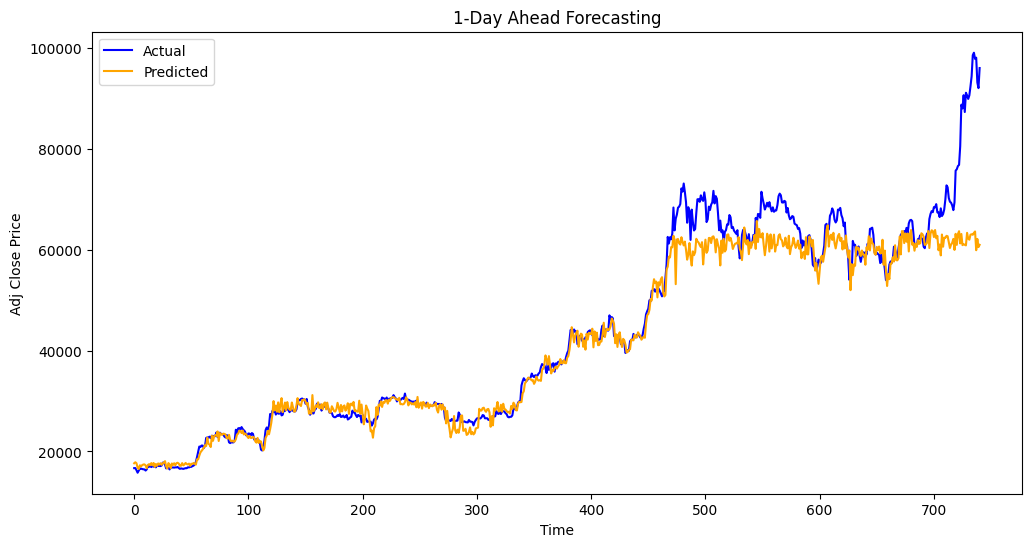

In [51]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", color='orange')
plt.title("1-Day Ahead Forecasting")
plt.xlabel("Time")
plt.ylabel("Adj Close Price")
plt.legend()
plt.show()
